# 주성분 분석(PCA: Principal Component Analysis)

- 다차원 데이터의 차원을 축소하는 기법
- 프로젝트 마지막에 항상 해줌
- 개발에 적용하기 전에 컬럼을 줄일 수록 빠르기 때문


https://butter-shower.tistory.com/210

https://m.blog.naver.com/tjdrud1323/221720259834

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

fruits = np.load('data/fruits.npy')
fruits.shape

(300, 100, 100)

In [3]:
# 2차원 배열로 변환하기
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

## PCA 모델 구성하기

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
pca.explained_variance_ratio_

array([0.42466785, 0.09959341, 0.06600459, 0.04036187, 0.03421961,
       0.0328296 , 0.02580132, 0.02056238, 0.01370269, 0.01336629,
       0.01148829, 0.00942765, 0.00875025, 0.00843704, 0.006909  ,
       0.00641755, 0.00574158, 0.00508522, 0.00483474, 0.00476165,
       0.00446464, 0.00433296, 0.00405801, 0.00386895, 0.00370834,
       0.00356397, 0.00329748, 0.00316431, 0.00302456, 0.00301545,
       0.0028718 , 0.00273666, 0.00263346, 0.00254059, 0.00250766,
       0.00245235, 0.0023795 , 0.00229417, 0.00221312, 0.00215516,
       0.00212119, 0.00194818, 0.00190999, 0.00188555, 0.00182624,
       0.00180489, 0.00170502, 0.00167833, 0.00160267, 0.00157961])

In [7]:
# 축소된 차원 크기 확인하기
print(pca.components_.shape)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 갯수
  
  # 한 줄에 10개씩 이미지 그리기. 샘플갯수를 10으로 나어 전체 행  수를 계산
  rows = int(np.ceil(n / 10))

  # 행이 1개면 열 갯수가 샘플 갯수이고, 그렇지 않으면 열 갯수는 10
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

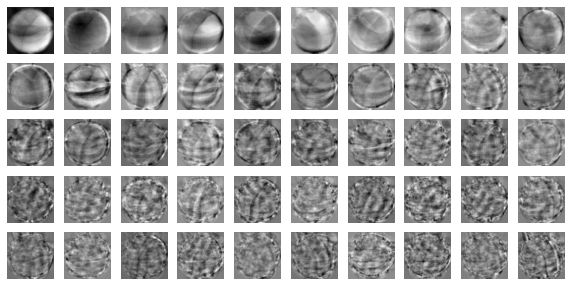

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape)

# 10000개 특성 > 50개 주성분
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


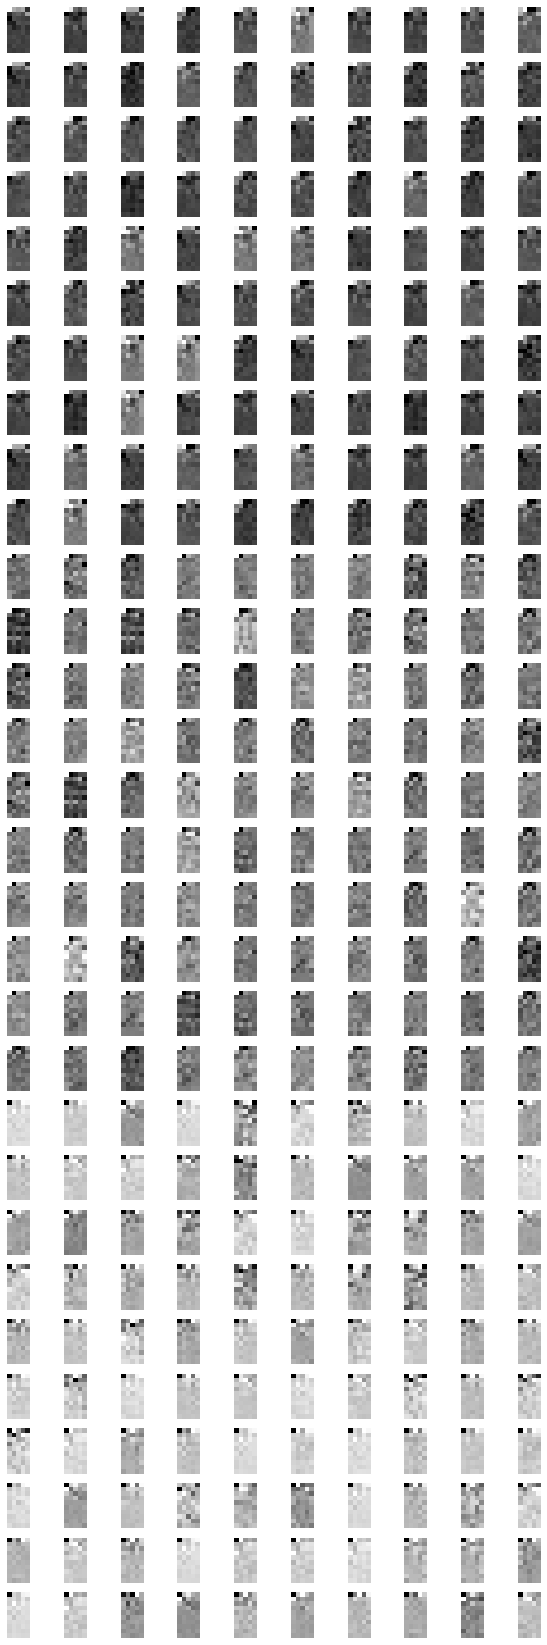

In [11]:
draw_fruits(fruits_pca.reshape(-1, 10, 5))

## 원본 데이터 재구성

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [13]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

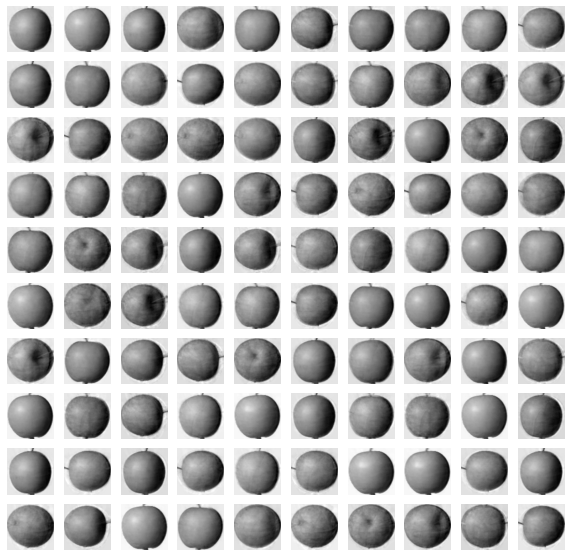

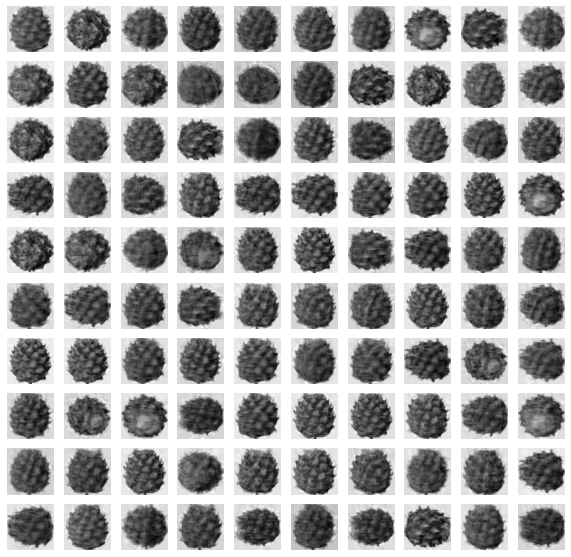

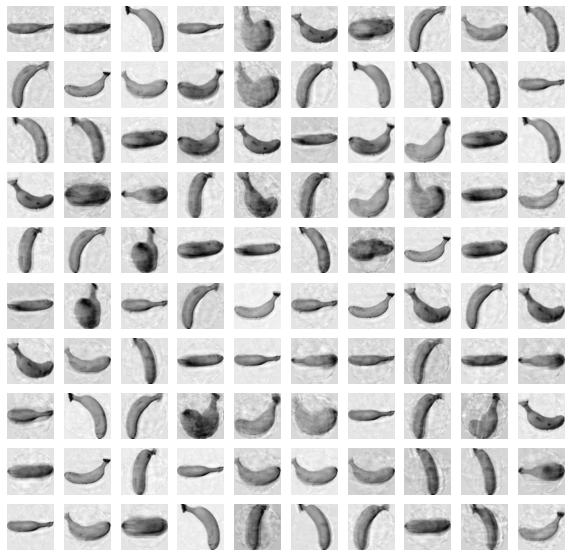

In [14]:
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

> 1/200의 데이터 특성만 가지고도 전반적 배경은 깨끗하지 않으나 물체의 구분은 가능하다 (해상도 줄인 것)

---
# 설명된 분산
: 주성분으로 구성할 때 원본 데이터의 분산을 어느정도 유지하고 있었는지 확인하는 방법

https://butter-shower.tistory.com/210

In [15]:
np.sum(pca.explained_variance_ratio_) # 59개의 주성분 데이터가 92%의 분산을 유지하고 있음

0.9223073891794138

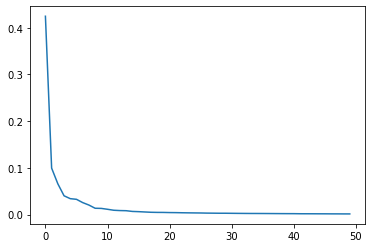

In [16]:
# 그래프 그리기 > y축은 오차율
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 주성분을 10개만 해도 꽤 많이 유지할 수 있다

---
## 주성분을 10개만 잡아서 해보자

In [17]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

# 확인하기
print(pca10.components_.shape)

# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape)

# 10000개 특성 > 50개 주성분
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape)

(10, 10000)
(300, 10000)
(300, 10)


In [18]:
fruits_inverse10 = pca10.inverse_transform(fruits_pca10)
print(fruits_inverse10.shape)

# 그림을 그리기 위해 2차원 확장
fruits_reconstruct10 = fruits_inverse10.reshape(-1, 100, 100)
fruits_reconstruct10.shape

(300, 10000)


(300, 100, 100)

In [19]:
np.sum(pca10.explained_variance_ratio_) # 10개의 주성분 데이터가 77%의 분산을 유지하고 있음

0.7711096082833064

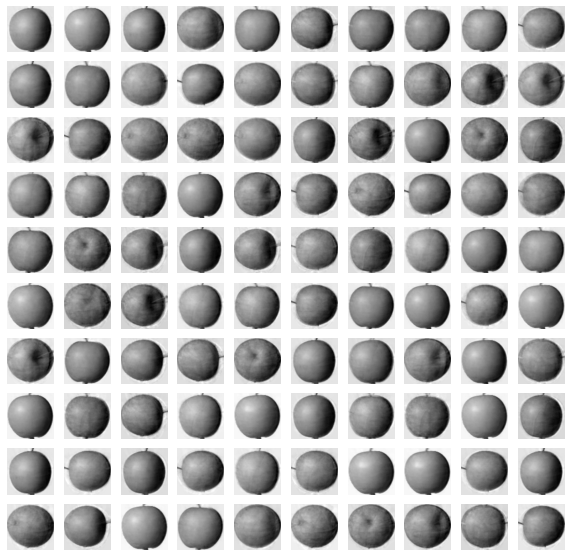

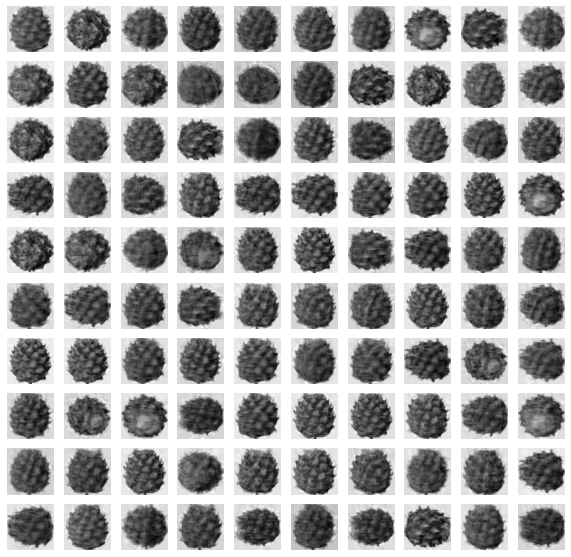

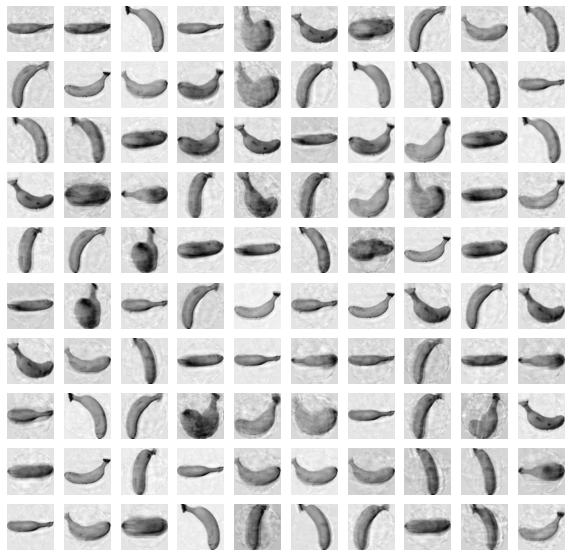

In [20]:
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

---
### 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
# 로지스틱 회귀분석은 지도학습이므로 Target을 제공해야 함
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.5199562549591065


> 정확도는 99.7% 정도이며, 계산에 필요한 시간은 약 0.5초

In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.035364627838134766


> 정확도가 오르고 계산 소요시간이 1/10으로 줄어들었다

---
## 주성분 분석의 분산의 크기를 정해 사용하기

In [29]:
pca = PCA(n_components=0.5) # n_components를 실수를 정하면 분산의 percentage 정도로 나타낸다.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [27]:
print(pca.n_components_)

2


> 2개만 있어도 50%는 맞출 수 있다고 함   
> 필요한 주성분 Feature를 2개로 사용. 2개면 그래프로 표현이 가능하다

In [30]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [31]:
# 교차 검증으로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03725905418395996


> 정확도는 99.3%이며, 계산시간은 0.04초이다.

In [33]:
import pandas as pd

# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)

# 데이터 프레임 구성
df = pd.DataFrame(pcaComponents, columns=['component1', 'component2'])
df.head()

,component1,component2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


---
# K_mans에 주성분 분석 적용해보기

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [38]:
# 군집 갯수와 빈도수 확인
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

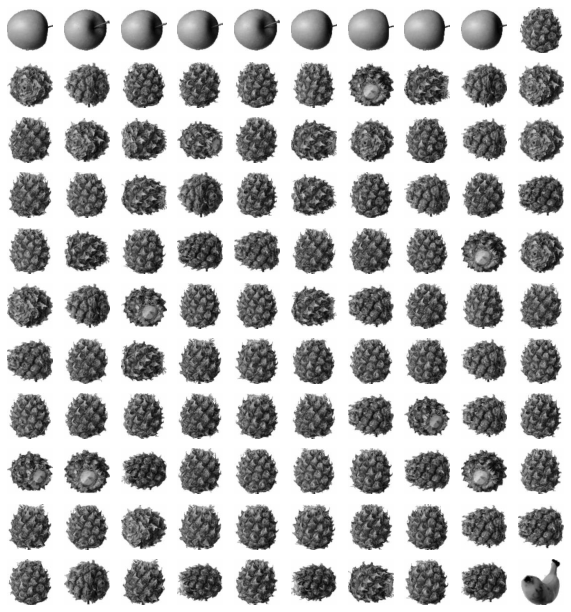

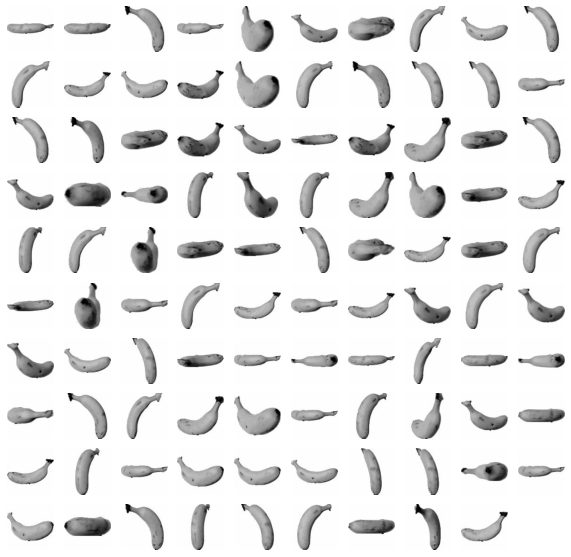

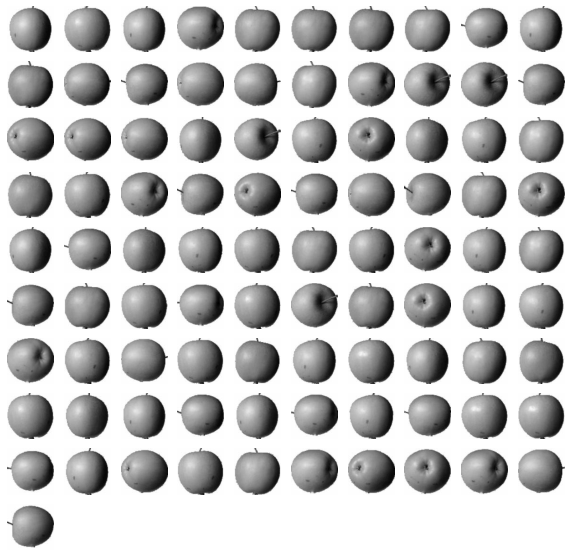

In [39]:
# 그림으로 확인하기
for label in range(0, 3):
  draw_fruits(fruits[kmeans.labels_ == label])
  print('\n')

---
# 산포도로 확인해보기

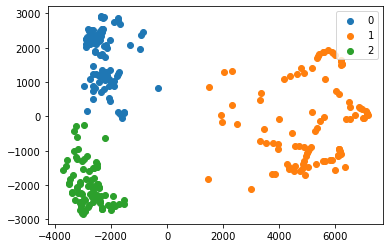

In [40]:
for label in range(0, 3):
  data = fruits_pca[kmeans.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1], label=str(label))
plt.legend()
plt.show()